#Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Import dataset

In [ ]:
dataset = pd.read_csv('Train_BigMart.csv')

In [ ]:
dataset.isnull().sum().sort_values(ascending = False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Outlet_Sales               0
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64

Understanding the dataset and dependencies


In [ ]:
#Divide dataset into numerical, categorical and target data and combine them after encoding

In [ ]:
num_data = []
cat_data = []
target = []

for i,c in enumerate(dataset.dtypes):
  if c == object:
    cat_data.append(dataset.iloc[:, i])
  else:
    num_data.append(dataset.iloc[:, i])


In [ ]:
num_data = pd.DataFrame(num_data).transpose()
cat_data = pd.DataFrame(cat_data).transpose()
target = num_data.iloc[:, -1].values
num_data = pd.DataFrame(num_data).drop('Item_Outlet_Sales', axis = 1)

In [ ]:
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,1999.0
1,5.92,0.019278,48.2692,2009.0
2,17.50,0.016760,141.6180,1999.0
3,19.20,0.000000,182.0950,1998.0
4,8.93,0.000000,53.8614,1987.0


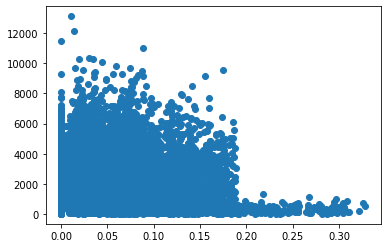

In [ ]:
plt.scatter(num_data.iloc[:, 1], target)

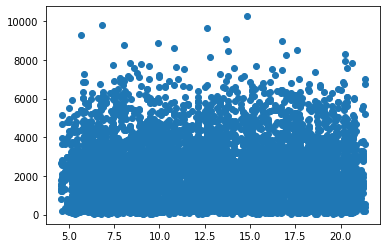

In [ ]:
plt.scatter(num_data.iloc[:, 0], target)

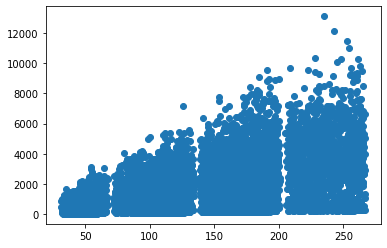

In [ ]:
plt.scatter(num_data.iloc[:, 2], target)

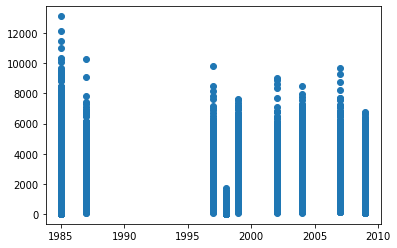

In [ ]:
plt.scatter(num_data.iloc[:, 3], target)

In [ ]:
cat_data.head

<bound method NDFrame.head of      Item_Identifier Item_Fat_Content  ... Outlet_Location_Type        Outlet_Type
0              FDA15          Low Fat  ...               Tier 1  Supermarket Type1
1              DRC01          Regular  ...               Tier 3  Supermarket Type2
2              FDN15          Low Fat  ...               Tier 1  Supermarket Type1
3              FDX07          Regular  ...               Tier 3      Grocery Store
4              NCD19          Low Fat  ...               Tier 3  Supermarket Type1
...              ...              ...  ...                  ...                ...
8518           FDF22          Low Fat  ...               Tier 3  Supermarket Type1
8519           FDS36          Regular  ...               Tier 2  Supermarket Type1
8520           NCJ29          Low Fat  ...               Tier 2  Supermarket Type1
8521           FDN46          Regular  ...               Tier 3  Supermarket Type2
8522           DRG01          Low Fat  ...               

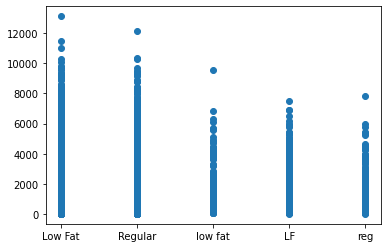

In [ ]:
plt.scatter(cat_data.iloc[:, 1], target)

Fill missing Data


In [ ]:
cat_data.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [ ]:
num_data.isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [ ]:
num_data.interpolate()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.300,0.016047,249.8092,1999.0
1,5.920,0.019278,48.2692,2009.0
2,17.500,0.016760,141.6180,1999.0
3,19.200,0.000000,182.0950,1998.0
4,8.930,0.000000,53.8614,1987.0
...,...,...,...,...
8518,6.865,0.056783,214.5218,1987.0
8519,8.380,0.046982,108.1570,2002.0
8520,10.600,0.035186,85.1224,2004.0
8521,7.210,0.145221,103.1332,2009.0


In [ ]:
num_data.isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [ ]:
for i in num_data:
  num_data[i].interpolate(method = 'linear')

In [ ]:
num_data.isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [ ]:
num_data = num_data.interpolate()

In [ ]:
num_data.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
dtype: int64

In [ ]:
num_data.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.300,0.016047,249.8092,1999.0
1,5.920,0.019278,48.2692,2009.0
2,17.500,0.016760,141.6180,1999.0
3,19.200,0.000000,182.0950,1998.0
4,8.930,0.000000,53.8614,1987.0
5,10.395,0.000000,51.4008,2009.0
6,13.650,0.012741,57.6588,1987.0
7,14.925,0.127470,107.7622,1985.0
8,16.200,0.016687,96.9726,2002.0
9,19.200,0.094450,187.8214,2007.0


In [ ]:
cat_data.fillna(method = 'bfill', inplace = True)

In [ ]:
cat_data.isnull().sum().any()

False

In [ ]:
cat_data

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,High,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Small,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


#Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_data:
  cat_data[i] = le.fit_transform(cat_data[i])

In [ ]:
cat_data

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,1,4,9,1,0,1
1,8,2,14,3,1,2,2
2,662,1,10,9,1,0,1
3,1121,2,6,0,0,2,0
4,1297,1,9,1,0,2,1
...,...,...,...,...,...,...,...
8518,370,1,13,1,0,2,1
8519,897,2,0,7,2,1,1
8520,1357,1,8,6,2,1,1
8521,681,2,13,3,1,2,2


In [ ]:
df = pd.concat([cat_data, num_data, pd.DataFrame(target)], axis = 1)

In [ ]:
df.head

<bound method NDFrame.head of       Item_Identifier  Item_Fat_Content  ...  Outlet_Establishment_Year          0
0                 156                 1  ...                     1999.0  3735.1380
1                   8                 2  ...                     2009.0   443.4228
2                 662                 1  ...                     1999.0  2097.2700
3                1121                 2  ...                     1998.0   732.3800
4                1297                 1  ...                     1987.0   994.7052
...               ...               ...  ...                        ...        ...
8518              370                 1  ...                     1987.0  2778.3834
8519              897                 2  ...                     2002.0   549.2850
8520             1357                 1  ...                     2004.0  1193.1136
8521              681                 2  ...                     2009.0  1845.5976
8522               50                 1  ...             

In [ ]:
df.isnull().sum().any()

False

In [ ]:
df

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,0
0,156,1,4,9,1,0,1,9.300,0.016047,249.8092,1999.0,3735.1380
1,8,2,14,3,1,2,2,5.920,0.019278,48.2692,2009.0,443.4228
2,662,1,10,9,1,0,1,17.500,0.016760,141.6180,1999.0,2097.2700
3,1121,2,6,0,0,2,0,19.200,0.000000,182.0950,1998.0,732.3800
4,1297,1,9,1,0,2,1,8.930,0.000000,53.8614,1987.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,1,13,1,0,2,1,6.865,0.056783,214.5218,1987.0,2778.3834
8519,897,2,0,7,2,1,1,8.380,0.046982,108.1570,2002.0,549.2850
8520,1357,1,8,6,2,1,1,10.600,0.035186,85.1224,2004.0,1193.1136
8521,681,2,13,3,1,2,2,7.210,0.145221,103.1332,2009.0,1845.5976


In [ ]:
df.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], inplace = True, axis = 1)

In [ ]:
df

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,0
0,1,4,1,0,1,9.300,0.016047,249.8092,3735.1380
1,2,14,1,2,2,5.920,0.019278,48.2692,443.4228
2,1,10,1,0,1,17.500,0.016760,141.6180,2097.2700
3,2,6,0,2,0,19.200,0.000000,182.0950,732.3800
4,1,9,0,2,1,8.930,0.000000,53.8614,994.7052
...,...,...,...,...,...,...,...,...,...
8518,1,13,0,2,1,6.865,0.056783,214.5218,2778.3834
8519,2,0,2,1,1,8.380,0.046982,108.1570,549.2850
8520,1,8,2,1,1,10.600,0.035186,85.1224,1193.1136
8521,2,13,1,2,2,7.210,0.145221,103.1332,1845.5976


#Train Test Split

In [ ]:
X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Computing values from all methods


1. Multiple Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

In [ ]:
print(score)

0.5074702087220906


2. Polynomial Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
lr.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr.predict(poly_reg.transform(X_test))
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.596423138152365


3. Support Vector Machine

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'poly', degree = 2)
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = svr.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

print(score)

0.2798251893319995


4. Decision Trees

In [ ]:
from sklearn.tree  import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0, max_depth = 1)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_pred = dtr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.23420989530535374

5. Random Forest regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = rfr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5368165977375339

# Model improvement

Let us try feature scaling in order to get better results

In [ ]:
from sklearn.preprocessing import  StandardScaler
ss = StandardScaler()
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)
y_train = ss.fit_transform(y_train)
y_test = ss.transform(y_test)

In [ ]:
print(y_test)

[[-0.44149123]
 [-0.57306701]
 [-0.20098476]
 ...
 [ 0.41433698]
 [-1.14973593]
 [ 1.93468145]]


In [ ]:
print(y_train)

[[ 1.36582118]
 [-0.63826925]
 [ 0.23317627]
 ...
 [-0.43446345]
 [ 0.59003164]
 [ 1.38690454]]


In [ ]:
X_train

array([[1.00000000e+00, 6.00000000e+00, 1.00000000e+00, ...,
        1.06850000e+01, 8.72234200e-03, 1.23541400e+02],
       [1.00000000e+00, 1.40000000e+01, 1.00000000e+00, ...,
        1.87000000e+01, 1.46226250e-02, 5.20324000e+01],
       [2.00000000e+00, 0.00000000e+00, 2.00000000e+00, ...,
        1.58500000e+01, 1.21632721e-01, 6.06220000e+01],
       ...,
       [2.00000000e+00, 1.30000000e+01, 2.00000000e+00, ...,
        1.35000000e+01, 0.00000000e+00, 7.83960000e+01],
       [1.00000000e+00, 5.00000000e+00, 0.00000000e+00, ...,
        1.87000000e+01, 1.04890428e-01, 1.21407200e+02],
       [1.00000000e+00, 1.50000000e+01, 1.00000000e+00, ...,
        1.40000000e+01, 4.13553660e-02, 1.82063400e+02]])

In [ ]:
df

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,0
0,1,4,1,0,1,9.300,0.016047,249.8092,3735.1380
1,2,14,1,2,2,5.920,0.019278,48.2692,443.4228
2,1,10,1,0,1,17.500,0.016760,141.6180,2097.2700
3,2,6,0,2,0,19.200,0.000000,182.0950,732.3800
4,1,9,0,2,1,8.930,0.000000,53.8614,994.7052
...,...,...,...,...,...,...,...,...,...
8518,1,13,0,2,1,6.865,0.056783,214.5218,2778.3834
8519,2,0,2,1,1,8.380,0.046982,108.1570,549.2850
8520,1,8,2,1,1,10.600,0.035186,85.1224,1193.1136
8521,2,13,1,2,2,7.210,0.145221,103.1332,1845.5976


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [ ]:
print(X_train)

[[1.00000000e+00 6.00000000e+00 1.00000000e+00 ... 1.06850000e+01
  8.72234200e-03 1.23541400e+02]
 [1.00000000e+00 1.40000000e+01 1.00000000e+00 ... 1.87000000e+01
  1.46226250e-02 5.20324000e+01]
 [2.00000000e+00 0.00000000e+00 2.00000000e+00 ... 1.58500000e+01
  1.21632721e-01 6.06220000e+01]
 ...
 [2.00000000e+00 1.30000000e+01 2.00000000e+00 ... 1.35000000e+01
  0.00000000e+00 7.83960000e+01]
 [1.00000000e+00 5.00000000e+00 0.00000000e+00 ... 1.87000000e+01
  1.04890428e-01 1.21407200e+02]
 [1.00000000e+00 1.50000000e+01 1.00000000e+00 ... 1.40000000e+01
  4.13553660e-02 1.82063400e+02]]


#Re-Evaluating models 

1. Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(score)

0.2798251893319995


2. Polynomial Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lr.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr.predict(poly_reg.transform(X_test))
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

-2682337.8422195055


3. Support Vector Machine

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'poly', degree = 2)
svr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = svr.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

print(score)

-0.8887568154777372


4. Decision Trees

In [ ]:
from sklearn.tree  import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0, max_depth = 1)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_pred = dtr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.2357469085008821

5. Random Forest regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = rfr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-1.2669240686787733

Since scaling resulted in poor performance, so let us revert the chnages

In [ ]:
X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
df

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,0
0,1,4,1,0,1,9.300,0.016047,249.8092,3735.1380
1,2,14,1,2,2,5.920,0.019278,48.2692,443.4228
2,1,10,1,0,1,17.500,0.016760,141.6180,2097.2700
3,2,6,0,2,0,19.200,0.000000,182.0950,732.3800
4,1,9,0,2,1,8.930,0.000000,53.8614,994.7052
...,...,...,...,...,...,...,...,...,...
8518,1,13,0,2,1,6.865,0.056783,214.5218,2778.3834
8519,2,0,2,1,1,8.380,0.046982,108.1570,549.2850
8520,1,8,2,1,1,10.600,0.035186,85.1224,1193.1136
8521,2,13,1,2,2,7.210,0.145221,103.1332,1845.5976


Let us do the plotting again, in order to see which dependent variable can be removed in order to get better results

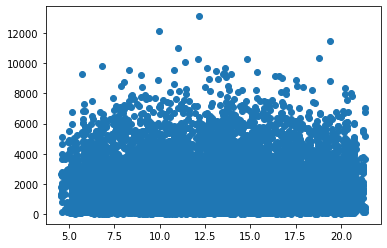

In [ ]:
plt.scatter(X[:, -3], y)

In [ ]:
df.drop('Item_Weight', inplace = True, axis = 1)

In [ ]:
df

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility,Item_MRP,0
0,1,4,1,0,1,0.016047,249.8092,3735.1380
1,2,14,1,2,2,0.019278,48.2692,443.4228
2,1,10,1,0,1,0.016760,141.6180,2097.2700
3,2,6,0,2,0,0.000000,182.0950,732.3800
4,1,9,0,2,1,0.000000,53.8614,994.7052
...,...,...,...,...,...,...,...,...
8518,1,13,0,2,1,0.056783,214.5218,2778.3834
8519,2,0,2,1,1,0.046982,108.1570,549.2850
8520,1,8,2,1,1,0.035186,85.1224,1193.1136
8521,2,13,1,2,2,0.145221,103.1332,1845.5976


In [ ]:
X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Recomputation of models

1. Multiple Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

In [ ]:
print(score)

0.5074782834962333


2. Polynomial Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
lr.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr.predict(poly_reg.transform(X_test))
from sklearn.metrics import r2_score
score1 = r2_score(y_test, y_pred)
print(score1)
lr.score(X_poly, y_train)

0.6002117979646328


0.6073100178846744

3. Support Vector Machine

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = svr.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

print(score)
svr.score(X_train, y_train)

0.46777597798936277


0.46650038949905004

4. Decision Trees

In [ ]:
from sklearn.tree  import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0, max_depth = 30, min_samples_leaf= 100)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=30,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_pred = dtr.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)
dtr.score(X_train, y_train)

0.5816379657766548


0.6149317523750002

5. Random Forest regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators= 400, max_depth = 6, min_samples_leaf= 100, n_jobs = 4)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = rfr.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)
rfr.score(X_train, y_train)

0.5894412536659465


0.6070398125496734

In [ ]:
df

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility,Item_MRP,0
0,1,4,1,0,1,0.016047,249.8092,3735.1380
1,2,14,1,2,2,0.019278,48.2692,443.4228
2,1,10,1,0,1,0.016760,141.6180,2097.2700
3,2,6,0,2,0,0.000000,182.0950,732.3800
4,1,9,0,2,1,0.000000,53.8614,994.7052
...,...,...,...,...,...,...,...,...
8518,1,13,0,2,1,0.056783,214.5218,2778.3834
8519,2,0,2,1,1,0.046982,108.1570,549.2850
8520,1,8,2,1,1,0.035186,85.1224,1193.1136
8521,2,13,1,2,2,0.145221,103.1332,1845.5976


6. XGBRegressor 

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators =1000, learning_rate = 0.05)
xgb.fit(X_train, y_train)

[06:21:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xgb.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)
xgb.score(X_train, y_train)

0.5649115814837713


0.7113539581705703

Our Max score obtained is for XGBRegressor i.e. 71%, but highest r2_score is for Multiple Linear Regression model i.e. 61%, which is a good result.

But still, the accuracy is low, which can be dependent on many factors like:
1. Less data
2. More missing values
